# Deep Neural Network using Keras

In [1]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

In [2]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of 
                        # numbers will appear every time. 
tf.set_random_seed(42)  # sets the graph-level random seed

## Dataset

In [3]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(Xtrain[0,:,:], cmap='gray')
plt.title("Ground Truth (Train) : {}".format(Ytrain[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(Xtest[0,:,:], cmap='gray')
plt.title("Ground Truth (Test): {}".format(Ytest[0]))

Text(0.5, 1.0, 'Ground Truth (Test): 7')

In [5]:
# size of the datsets

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  24 209 254 254 254
 171   0   0   0   0   0   0   0   0   0]
Xtest 
 [  0   0   0   0   0   0   0   0 194 254 103   0   0   0   0   0   0   0
   0   0 150 254 213   0   0   0   0   0]
Ytrain 
 3
Ytest 
 0


In [7]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28. 
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [8]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 0.0
Xtest 
 0.0
Ytrain 
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Ytest 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## DNN Model

Using Keras, create the DNN or Sequential Model

In [9]:
# Create a model object

dnnModel = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [10]:
# Layer 1 = input layer
# specify the input size in the first layer.

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))

# Layer 2 = hidden layer 
dnnModel.add(layers.Dense(60, activation='relu'))

# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu'))


# Layer 4 = output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3060      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 44,450
Trainable params: 44,450
Non-trainable params: 0
_________________________________________________________________


In [11]:
dnnModel_adam = models.Sequential()
dnnModel_adam.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))
dnnModel_adam.add(layers.Dense(60, activation='relu'))
dnnModel_adam.add(layers.Dense(30, activation='relu'))
dnnModel_adam.add(layers.Dense(10, activation='softmax'))
dnnModel_adam.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_5 (Dense)              (None, 60)                3060      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                310       
Total params: 44,450
Trainable params: 44,450
Non-trainable params: 0
_________________________________________________________________


In [13]:
dnnModel_rmsprop = models.Sequential()
dnnModel_rmsprop.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))
dnnModel_rmsprop.add(layers.Dense(60, activation='relu'))
dnnModel_rmsprop.add(layers.Dense(30, activation='relu'))
dnnModel_rmsprop.add(layers.Dense(10, activation='softmax'))
dnnModel_rmsprop.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_9 (Dense)              (None, 60)                3060      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                310       
Total params: 44,450
Trainable params: 44,450
Non-trainable params: 0
_________________________________________________________________


## Regularization and Optimizations of DNN

In [14]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
dnnModel.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'] )
dnnModel_adam.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )
dnnModel_rmsprop.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'] )

## Train the Model

In [16]:
# train the model

h_sgd  = dnnModel.fit( Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)
h_adam  = dnnModel_adam.fit( Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)
h_rms  = dnnModel_rmsprop.fit( Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 3s 55us/sample - loss: 1.0801 - acc: 0.6924 - val_loss: 0.3960 - val_acc: 0.8933
Epoch 2/25
54000/54000 [==============================] - 2s 40us/sample - loss: 0.3901 - acc: 0.8901 - val_loss: 0.2778 - val_acc: 0.9225
Epoch 3/25
54000/54000 [==============================] - 2s 38us/sample - loss: 0.3173 - acc: 0.9096 - val_loss: 0.2411 - val_acc: 0.9298
Epoch 4/25
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2801 - acc: 0.9193 - val_loss: 0.2171 - val_acc: 0.9393
Epoch 5/25
54000/54000 [==============================] - 2s 36us/sample - loss: 0.2534 - acc: 0.9277 - val_loss: 0.1981 - val_acc: 0.9430
Epoch 6/25
54000/54000 [==============================] - 2s 35us/sample - loss: 0.2333 - acc: 0.9332 - val_loss: 0.1845 - val_acc: 0.9483
Epoch 7/25
54000/54000 [==============================] - 2s 34us/sample - loss: 0.2167 - acc: 0.9377 - val_loss: 0.1

In [17]:
#print('Final training loss \t', h.history['loss'][-1])
print('SGD Final training accuracy ', h_sgd.history['acc'][-1])
print('Adam Final training accuracy ', h_adam.history['acc'][-1])
print('RMSProp Final training accuracy ', h_rms.history['acc'][-1])

SGD Final training accuracy  0.97231483
Adam Final training accuracy  0.9956667
RMSProp Final training accuracy  0.9952593


## Testing the Model

In [18]:
# testing the model

testLoss_sgd, testAccuracy_sgd = dnnModel.evaluate( Xtest, Ytest)
testLoss_adam, testAccuracy_adam = dnnModel_adam.evaluate( Xtest, Ytest)
testLoss_rms, testAccuracy_rms = dnnModel_rmsprop.evaluate( Xtest, Ytest)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.1582 - acc: 0.9743


In [ ]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

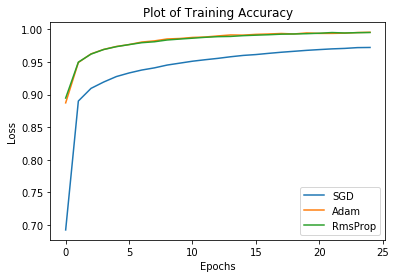

In [19]:
# plot the training accuracy

plt.plot(h_sgd.history['acc'], label='SGD')
plt.plot(h_adam.history['acc'], label='Adam')
plt.plot(h_rms.history['acc'], label='RmsProp')
#plt.plot(h.history['val_acc'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

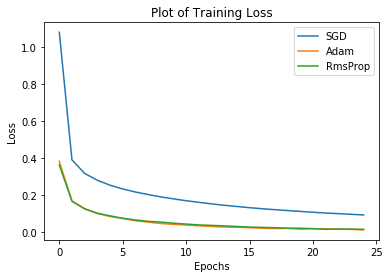

In [20]:
# plot the training loss

plt.plot(h_sgd.history['loss'], label='SGD')
plt.plot(h_adam.history['loss'], label='Adam')
plt.plot(h_rms.history['loss'], label='RmsProp')
#plt.plot(hes.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

# Exercise 

Modify the code to get a better testing accuracy.
- Change the number of hidden units
- Increase the number of hidden layers
- Use a different optimizer